In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from db_connection import get_engine

%matplotlib inline

engine = get_engine()

## Load Data

In [2]:
def load_data():
    query = """
        SELECT
            o.order_id,
            o.created_at::date AS order_date,
            oi.quantity,
            oi.total_price
        FROM orders o
        JOIN order_items oi ON o.order_id = oi.order_id
        WHERE o.is_active = TRUE
    """
    df = pd.read_sql(query, engine)
    if df.empty:
        raise ValueError("No sales data found.")
    df["revenue"] = df["total_price"]
    return df

df = load_data()
print(f"Loaded {len(df)} sales records.")
df.head()

Loaded 43 sales records.


,order_id,order_date,quantity,total_price,revenue
0,5,2025-12-12,3,120.0,120.0
1,6,2025-12-14,2,48.0,48.0
2,7,2025-12-14,3,72.0,72.0
3,8,2025-12-14,3,72.0,72.0
4,9,2025-12-14,2,48.0,48.0


## Calculate Trends

In [3]:
def calculate_trends(df: pd.DataFrame):
    df["order_date"] = pd.to_datetime(df["order_date"])
    trends = {}
    trends["daily_sales"] = df.groupby("order_date")["revenue"].sum()
    trends["weekly_sales"] = df.set_index("order_date").resample("W")["revenue"].sum()
    trends["monthly_sales"] = df.set_index("order_date").resample("M")["revenue"].sum()
    return trends

trends = calculate_trends(df)
print("Trends calculated.")

Trends calculated.


/tmp/ipykernel_61381/2272399590.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trends["monthly_sales"] = df.set_index("order_date").resample("M")["revenue"].sum()


## Trend Charts

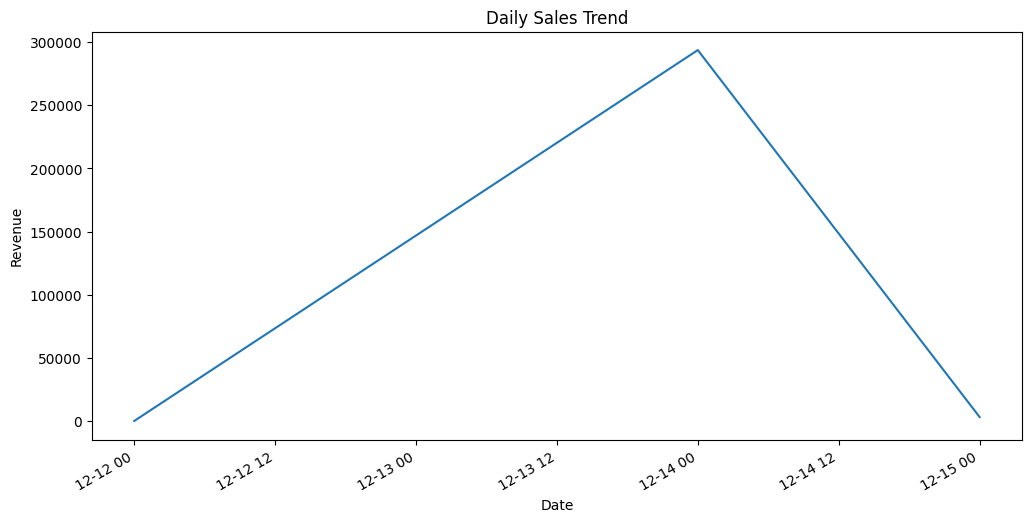

In [4]:
# Daily Sales
plt.figure(figsize=(12, 6))
trends["daily_sales"].plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

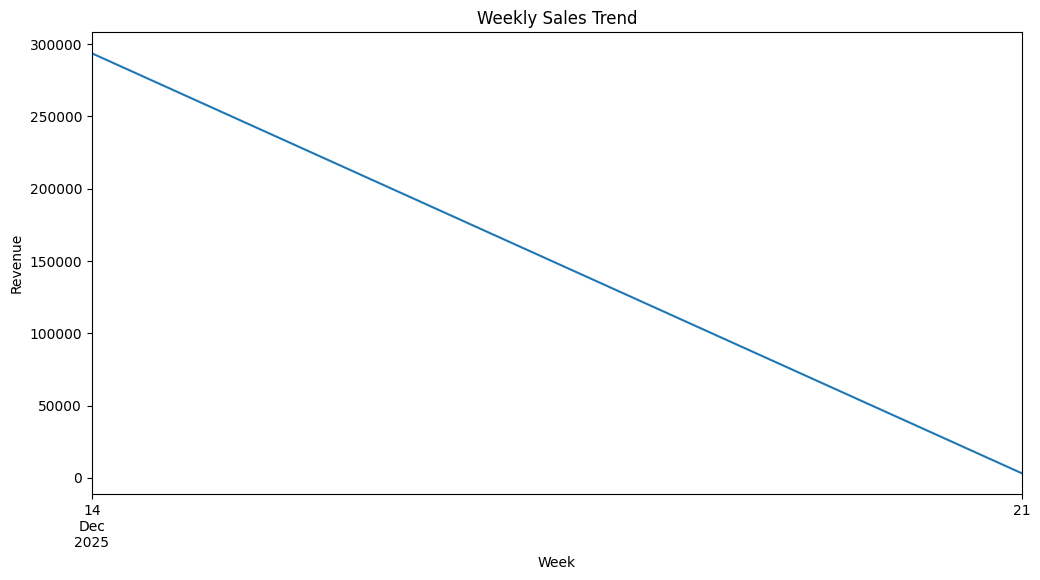

In [5]:
# Weekly Sales
plt.figure(figsize=(12, 6))
trends["weekly_sales"].plot()
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.show()

/home/Cohorte3/Sales-Scope/vnev/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


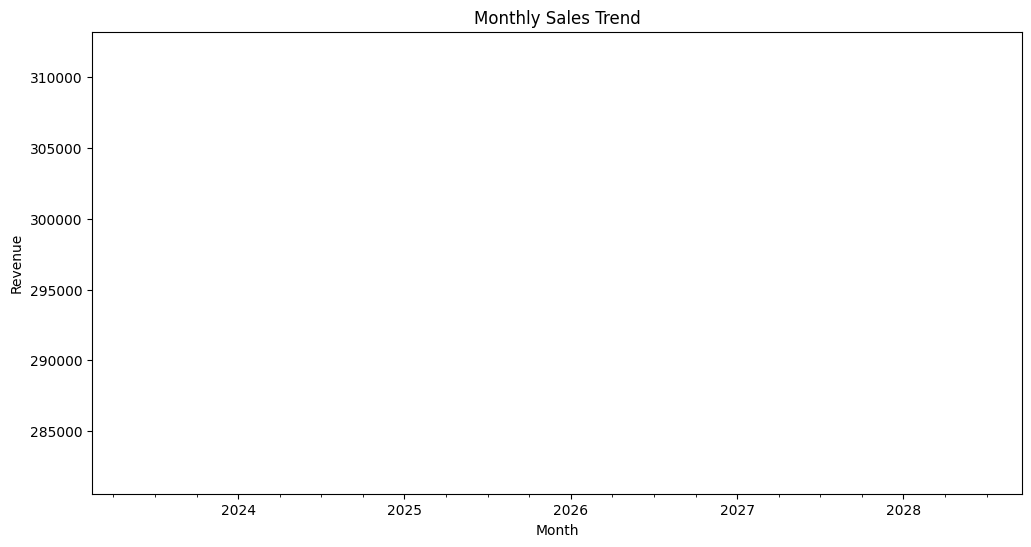

In [6]:
# Monthly Sales
plt.figure(figsize=(12, 6))
trends["monthly_sales"].plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

## Seasonality

In [7]:
def compute_seasonality(df):
    df["order_date"] = pd.to_datetime(df["order_date"])
    df["weekday"] = df["order_date"].dt.day_name()
    weekday_sales = df.groupby("weekday")["revenue"].sum().reindex([
        "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
    ])
    df["month"] = df["order_date"].dt.month
    monthly_sales = df.groupby("month")["revenue"].sum()
    return {"weekday_sales": weekday_sales, "monthly_sales": monthly_sales}

seasonality = compute_seasonality(df)

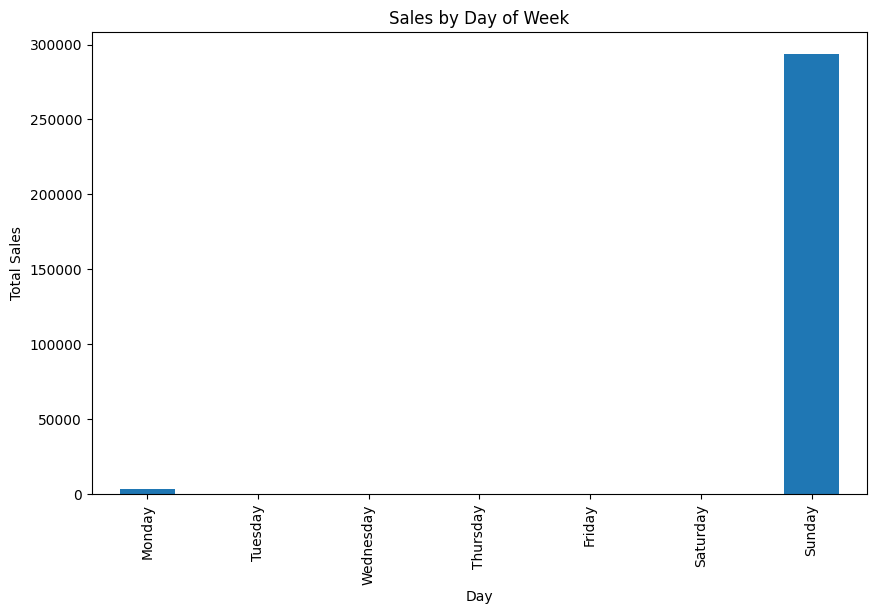

In [8]:
# Sales by Weekday
plt.figure(figsize=(10, 6))
seasonality["weekday_sales"].plot(kind="bar")
plt.title("Sales by Day of Week")
plt.ylabel("Total Sales")
plt.xlabel("Day")
plt.show()

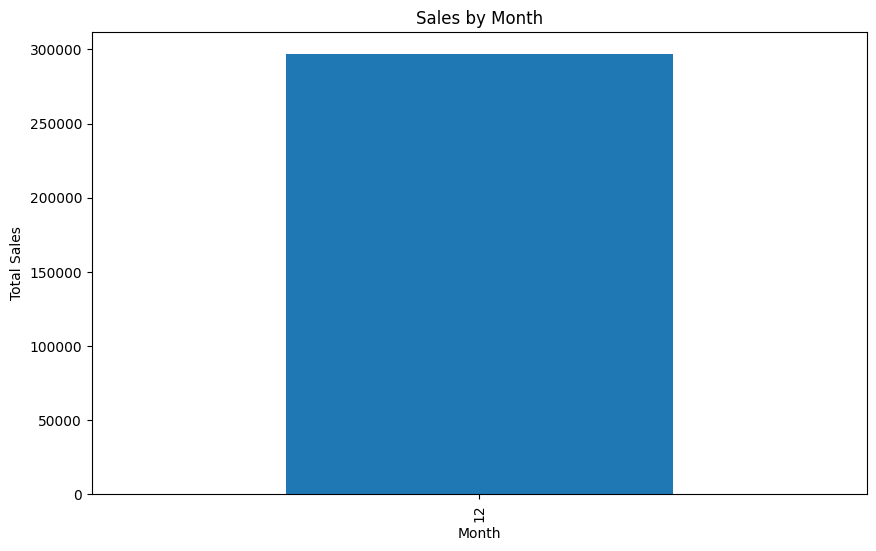

In [9]:
# Sales by Month
plt.figure(figsize=(10, 6))
seasonality["monthly_sales"].plot(kind="bar")
plt.title("Sales by Month")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()